In [1]:
import os
import csv
import math
import matplotlib.pyplot as plt

In [22]:
import numpy as np
csv_file = "20240502_amp9_res512_data.csv"
csv_file2 = "data_radial.csv"
cutoff = 0
actual_data = np.genfromtxt(csv_file, delimiter=',')[cutoff:]
actual_data2 = np.genfromtxt(csv_file2, delimiter=',')[cutoff:]

In [23]:
actual_data = (actual_data - 32768) * 15 / 32768
actual_data_x = actual_data[:, ::2]
actual_data_y = actual_data[:, 1::2]

actual_data2 = (actual_data2 - 32768) * 15 / 32768
actual_data_x2 = actual_data2[:, ::2]
actual_data_y2 = actual_data2[:, 1::2]

print(actual_data_x.shape, actual_data_x[0][0])
print(actual_data_y.shape, actual_data_y[0][0])

print(actual_data_x2.shape, actual_data_x2[0][0])
print(actual_data_y2.shape, actual_data_y2[0][0])


(320, 4273) -0.040740966796875
(320, 4272) -0.013275146484375
(50, 8113) 1.00982666015625
(50, 8112) -3.59619140625


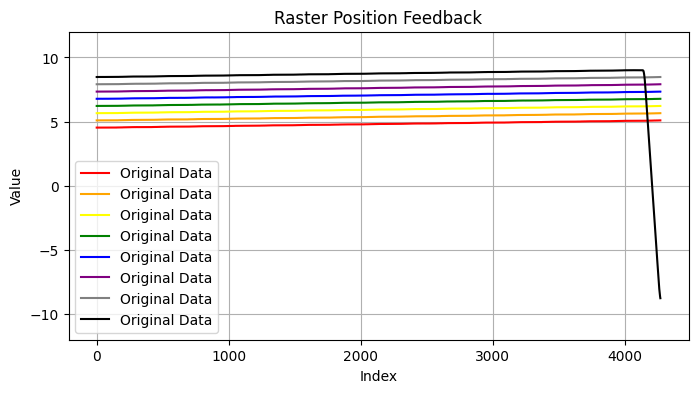

In [28]:
plt.figure(figsize=(8, 4))

start = 24
size = 8544
# Plot the original data
plt.plot(actual_data_y[start][0:size], color='red', label='Original Data')
plt.plot(actual_data_y[start + 1][0:size], color='orange', label='Original Data')
plt.plot(actual_data_y[start + 2][0:size], color='yellow', label='Original Data')
plt.plot(actual_data_y[start + 3][0:size], color='green', label='Original Data')
plt.plot(actual_data_y[start + 4][0:size], color='blue', label='Original Data')
plt.plot(actual_data_y[start + 5][0:size], color='purple', label='Original Data')
plt.plot(actual_data_y[start + 6][0:size], color='grey', label='Original Data')
plt.plot(actual_data_y[start + 7][0:size], color='black', label='Original Data')
#plt.plot(actual_data_y[4][0:4704], color='purple', label='Original Data')
plt.ylim(-12, 12)
#plt.plot(actual_data_y[7][0:4704], color='red', label='Buffer')
    
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raster Position Feedback')
plt.legend()
plt.grid(True)
plt.show()


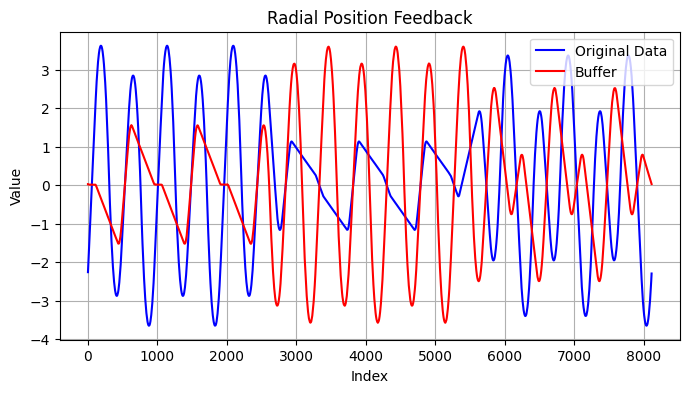

In [13]:
plt.figure(figsize=(8, 4))
    
# Plot the original data
plt.plot(actual_data_x2[10], color='blue', label='Original Data')

plt.plot(actual_data_y2[10], color='red', label='Buffer')
    
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Radial Position Feedback')
plt.legend()
plt.grid(True)
plt.show()